# Data Science 100 Final Project Report

In [1]:
#Loading the relevant R package:
library(tidyverse)
library(tidymodels)
library(repr)
library(themis)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# load the dataframes
players<- read_csv("https://raw.githubusercontent.com/ninzyt/dsci100-project-group37/refs/heads/main/players.csv")
sessions<- read_csv("https://raw.githubusercontent.com/ninzyt/dsci100-project-group37/refs/heads/main/sessions.csv")
head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


#### Summary table of `players.csv`:
| variable | type | meaning | # of missing observations | summary statistics (if applicable) |
|--|--|--|--|--|
|`experience`|character|The level of experience of the player (Beginner (least experienced), Amateur, Regular, Veteran, Pro (most experienced))|0|N/A|
|`subscribe`|logical|Whether subscribed to a game newsletter or not (True, or False)|0|N/A|
|`hashedEmail`|character|Private personal Email information|0|N/A|
|`played_hours`|double|The number of hours played by the player (hours)|0|Max = 223.1,   Min = 0,   Mean = 5.845918, Standard Deviation = 28.35734 |
|`name`|character|The player’s name|0|N/A|
|`gender`|character|The player’s gender (male, female, non-binary, agender, two-spirited, prefer not to say, other)|0|N/A|
|`age`|double|The player’s age (years)|2|Max = 50, Min = 8, Mean = 20.52062, Median = 19, Mode = 17, Standard Deviation = 6.174667|

**ISSUES:** 
- The `Age` variable appears to be skewed towards younger individuals, with the majority of players around the age of 20, indicating potential age bias in the data.
- The `played_hours` has many values with 0 hours and very small decimal points, so a potential conversion from hours to minutes may be necessary for a deeper and better future analysis.
-  The `played_hours` has many outliers
- session imbalance: some players have many/no sessions

#### Summary table of `sessions.csv`:
| variable | type | meaning | # of missing observations | summary statistics (if applicable) |
|--|--|--|--|--|
|`hashedEmail`|character|Private personal Email information|0|N/A|
|`start_time`|character|The start time, in human-readable timestamp|0|N/A|
|`end_time`|character|The end time, in human-readable timestamp|0|N/A|
|`original_start_time`|double|The start time and date of the play session in Unix time|0|Max = 1.72733e+12,   Min = 1.7124e+12,   Mean = 1.719201e+12,   Median = 1.7192e+12, Standard Deviation = 3557491589 |
|`original_end_time`|double|The end time and date of the play session in Unix time|2|Max = 1.72734e+12, Min = 1.7124e+12, Mean = 1.719196e+12, Median = 1.71918e+12, Standard Deviation = 3552813134|

**ISSUES:** 
- There are few visible issues, other than the 2 observations with missing data for both the `end_time` and `original_end_time` variable, which will need to be dealt with during later wrangling/processing.
- This should not have the issues associated with self-reported participant data, since the data is recorded by the server.
- However, since the `start_time` and `original_start_time` variables (same applies to the end time variables) contain the same information, only one is needed for each analysis, depending on needs. For example, visualizations may prefer the use of the `start_time` variable, but any modeling, etc. may benefit from the numerical format of `original_start_time`.


#### Indirect issues in the data

- The player’s `experience` is not 100% reliable as respondents could report misleading or inaccurate informations
- Bias in data collection (data only collected from mostly UBC, Canada).

### Data Preprocessing and Exploratory Visualization

In [3]:
# 1. Cleaning and wrangling players.csv 
players_cleaned <- players|>
                   filter(!is.na(Age))|>
                   mutate(subscribe = as.factor(subscribe))

head(players_cleaned)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [15]:
# 2. Summary statistics (mean values for each numerical variables)
players_average <- players_cleaned |>
                   summarize(min_played_hours = min(played_hours),
                             max_played_hours = max(played_hours),
                             average_played_hours = mean(played_hours),
                             min_age = min(Age),
                             max_age = max(Age),
                             median_age = median(Age),
                             mode_age = names(which.max(table(players_cleaned[[7]]))),
                             average_age = mean(Age))
players_average

min_played_hours,max_played_hours,average_played_hours,min_age,max_age,median_age,mode_age,average_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
0,223.1,5.904639,8,50,19,17,20.52062


**Statistics interpretation:**
- max_played_hours is much higher than average_played_hours, indicating that there may be outliers.
- We noticed that the Minecraft server used in the research autofills the default age to 17 for each player which might have caused the mode_age to be 17.
- average_age being around 20 makes sense since the research participant are mostly university students.

In [5]:
# 3. splitting dataframe into training, testing datasets
set.seed(1)
players_split <- initial_split(players_cleaned, prop = 0.75, strata = subscribe)

players_training <- training(players_split)
players_testing <- testing(players_split)

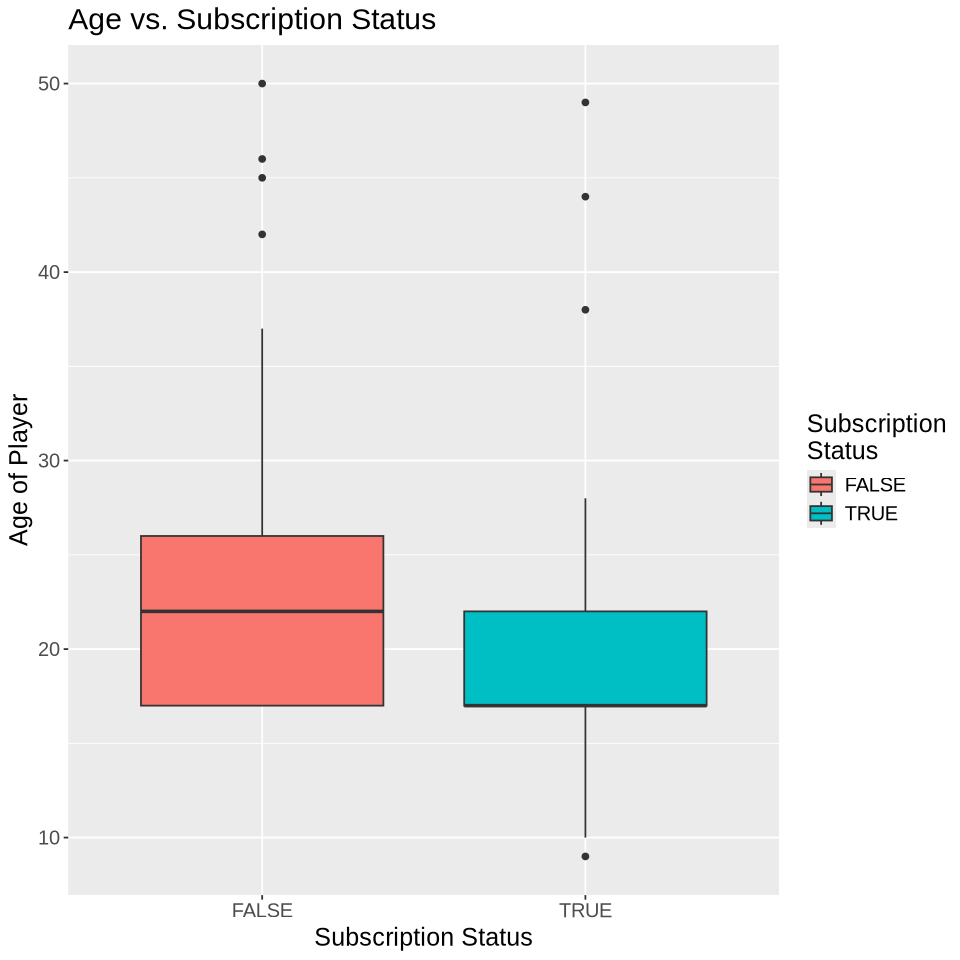

In [6]:
# 4. Exploratory visualizations
# a) finding relationships for the Age predictor:
options(repr.plot.width = 8, repr.plot.height = 8)
Age_boxplot <- ggplot(players_training, aes(x = subscribe, y = Age, fill = subscribe)) +
               geom_boxplot() +
               labs(x= "Subscription Status", y= "Age of Player", fill = "Subscription\nStatus", title = "Age vs. Subscription Status")+
               theme(text = element_text(size = 15))
Age_boxplot

Warning message in scale_y_log10(labels = label_comma()):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 65 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


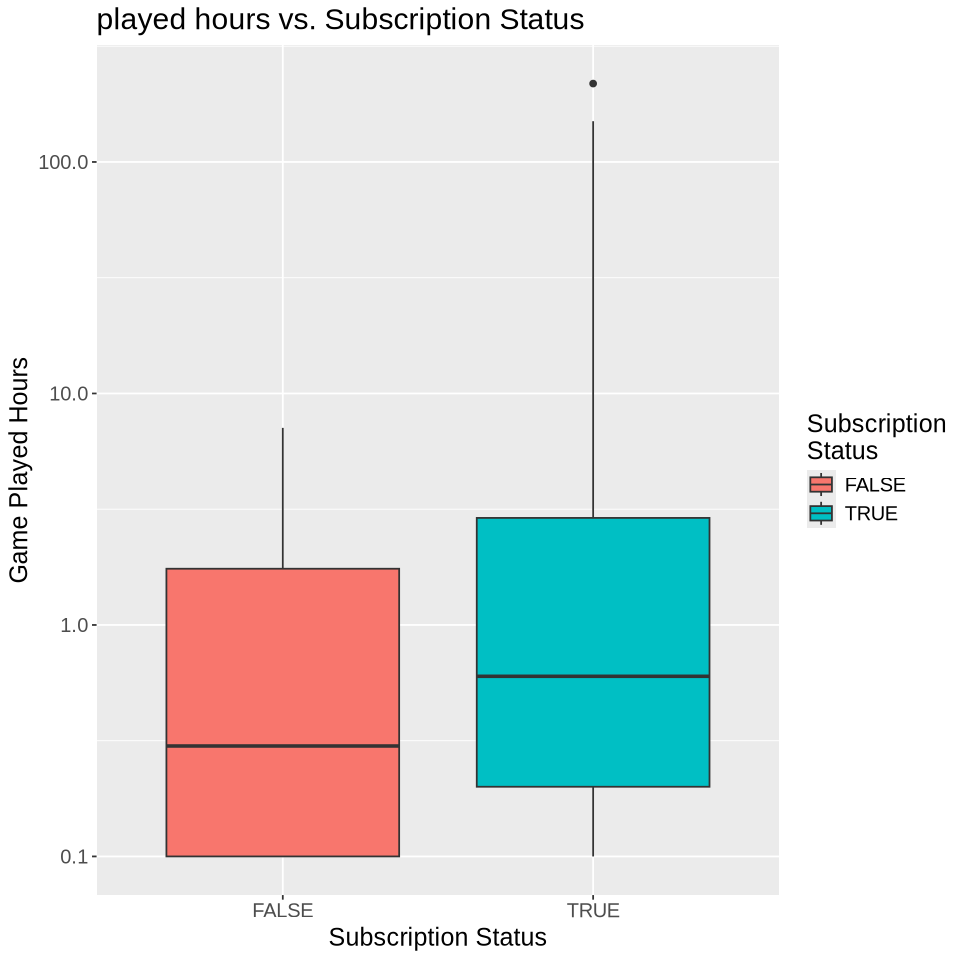

In [7]:
# b) finding relationships for the played_hours predictor:
options(repr.plot.width = 8, repr.plot.height = 8)
played_hours_boxplot <- ggplot(players_training, aes(x = subscribe, y = played_hours, fill = subscribe)) +
                        geom_boxplot() +
                        scale_y_log10(labels=label_comma())+
                        labs(x = "Subscription Status", y = "Game Played Hours", fill = "Subscription\nStatus", title = "played hours vs. Subscription Status")+
                        theme(text = element_text(size = 15))
played_hours_boxplot

### Methods and Plan
#### Method to use: Classification by K-nearest neighbors (KNN) classification algorithms
Why choose this method?

- Classification is appropriate for this predictive question as the question requires using given data on `played_hours` and `Age` to determine the class `subscribe` of a new sample.
- KNN classification algorithm does not require specific data or shape assumptions for the algorithm to perform well, since it is based on how close a new sample is to nearby points.

Model Application:

- Model comparison and selection will be done through cross-validation.
- The function `initial_split()` was used to split the dataframe into 75% training and 25% testing data, stratifying for `subscribe`. The data need to be splitted before applying KNN analysis so the testing data will be "untouched". 
- Cross-validation will be used to asses the model's performance. The k-folds will likely be 5, or 10-folds as higher k-folds increase cost. Additionally, tuning the model to determine the best K value will help maximize the accuracy of the classifier on new observations.  

Potential Limitations:

- KNN is very sensitive to scaling. If the ranges of values for `played_hours` and `Age` differ by a lot, biased neighbors will be chosen due to biased Euclidean distance, thus resulting in inaccurate prediction.
- Imbalance. If there are a lot more subscribed observations than unsubscribed, KNN will more likely to classify any new observations as subscribe, which is inaccurate.


In [8]:
# 5. Preparing the recipe using only the training data. The data is standardized and upsampled to resolve data imbalance issues. 
players_recipe<- recipe(subscribe~Age+played_hours, data=players_training)|>
step_scale(all_predictors())|>
step_center(all_predictors()) |>
step_upsample(subscribe, over_ratio = 1)

In [9]:
# 6. a) Cross-validation and Parameter (K) Value Selection
players_vfold<- vfold_cv(players_training, v=5, strata=subscribe)
players_spec_tune<- nearest_neighbor(weight_func="rectangular", neighbors=tune())|>
set_engine("kknn")|>
set_mode("classification")

k_vals<- tibble(neighbors=seq(from=1, to=100, by=1))

player_tune_results<- workflow()|>
add_recipe(players_recipe)|>
add_model(players_spec_tune)|>
tune_grid(resamples=players_vfold, grid=k_vals)|>
collect_metrics()

accuracy<- player_tune_results|>
filter(.metric=="accuracy")

[1] 89

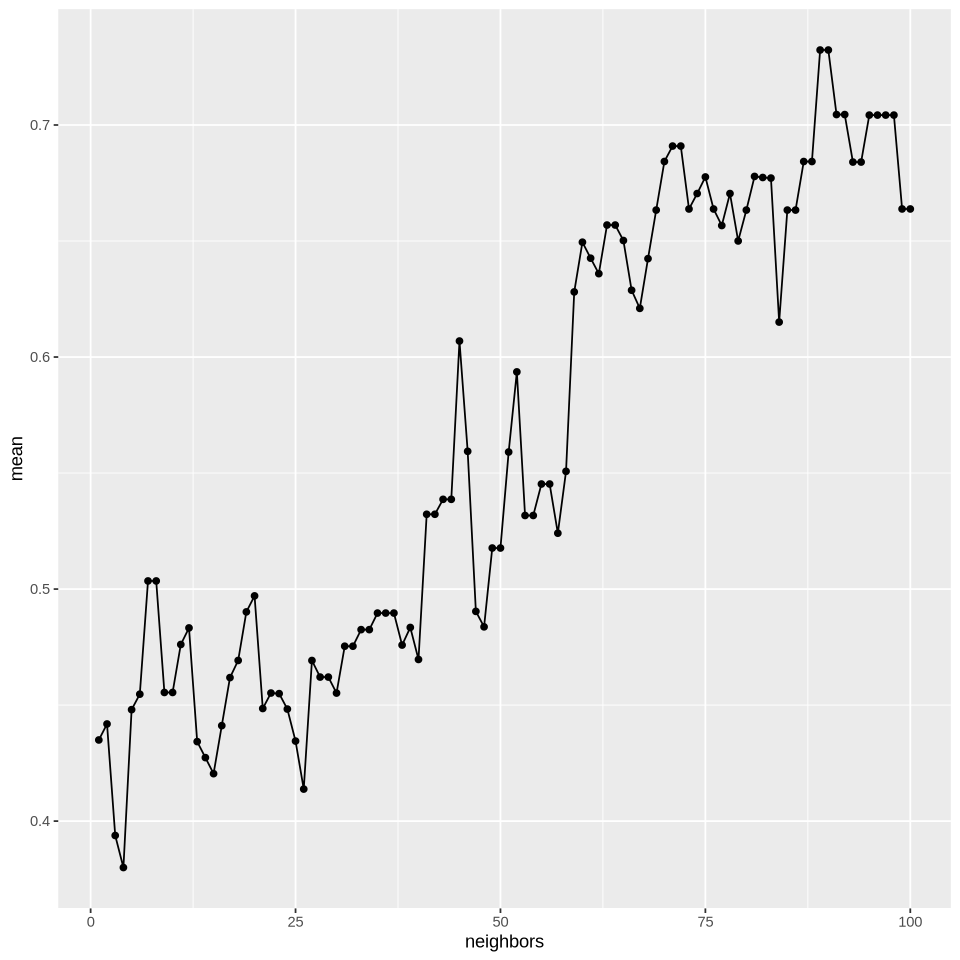

In [10]:
# 6. b) Best K value visualization and determination 
accuracy_vis_k<- ggplot(accuracy, aes(x=neighbors, y=mean))+
geom_point()+
geom_line()
accuracy_vis_k

best_k_val<- filter(accuracy, mean==max(mean)) |>
filter(neighbors == min(neighbors))|>
pull(neighbors)
best_k_val

In [16]:
# 7. a) Evaluate the tuned classifier on the testing data.
test_try_spec<- nearest_neighbor(weight_func = "rectangular", neighbors=best_k_val)|>
set_engine("kknn")|>
set_mode("classification")

test_fit<- workflow() |>
  add_recipe(players_recipe) |>
  add_model(test_try_spec) |>
  fit(data = players_training)

test_predictions <- predict(test_fit, players_testing) |>
  bind_cols(players_testing)

In [44]:
# 7. b) Assessing the estimated accuracy, precision and recall, and print a confusion matrix.

test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

test_predictions |>
    precision(truth = subscribe, estimate = .pred_class, event_level="second")

test_predictions |>
    recall(truth = subscribe, estimate = .pred_class, event_level="second")
test_predictions

confusion <- test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.4693878


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7777778


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.3888889


.pred_class,experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
TRUE,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
TRUE,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
FALSE,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
TRUE,Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
TRUE,Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
FALSE,Veteran,TRUE,bbe2d83de678f519c4b3daa7265e683b4fe2d814077f9094afd11d8f217039ec,0.0,Nyla,Female,22
FALSE,Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23
FALSE,Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25
FALSE,Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22


          Truth
Prediction FALSE TRUE
     FALSE     9   22
     TRUE      4   14